# Decision Tree - Coding

După ce am învățat partea teoretică urmează partea în care o să ne ocupăm de partea practică a acestei secțiuni.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

În cadrul setului de date de mai sus avem date despre anumiți pinguini, date precum sexul acestora, greutatea în grame, anumite măsurători și insula pe care au fost găsiți acești pinguini. Ca și partea de label avem specia din care fac parte acești pinguini. În acest date mai avem și date care lipsesc, prin urmare trebuie să facem și un feature engineering pe acest set de date

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Prin metoda de mai sus am șters toate datele rândurile care au date lipse și putem vedea că am mai rămas cu un număr de 334 de rânduri (din totalul de 344)

In [8]:
df = df.dropna()

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

În setul de date, în coloana 'sex' se poate observa faptul că există o intrare unde avem valoarea '.' pentru un anumit pinguin. Utilizând partea de pandas în care am grupat datele în funcție de specie și am descris valorile medii pentru fiecare specie și pentru fiecare sex separat din acea specie, după datele respective putem să ne dăm seama că acel pinguin are ca și sex valoarea de 'FEMALE'. Acest lucru este cel mai reprezentativ în cadrul coloanei 'body_mass_g' unde putem vedea că valoarea este cea mai apropiată de 'FEMALE'. Prin urmare putem să înlocuim cu 'FEMALE' pentru acel pinguin

In [ ]:
df.at[336, 'sex'] = 'FEMALE'

O modalitate de a înclocui valoare pentru un anumit feature la un singur rând este să utilizăm metoda 'df.at[]'. Ca și argumente o să îi atribuim prima dată index-ul unde se găsește acel element asupra căruia dorim să facem modificări, după care îi spunem ce coloană dorim să modificăm. Pentru a îi atribui o nouă valoare utilizăm semnul egal (=) urmat de valoarea pe care dorim să o atribuim acestui element

In [17]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

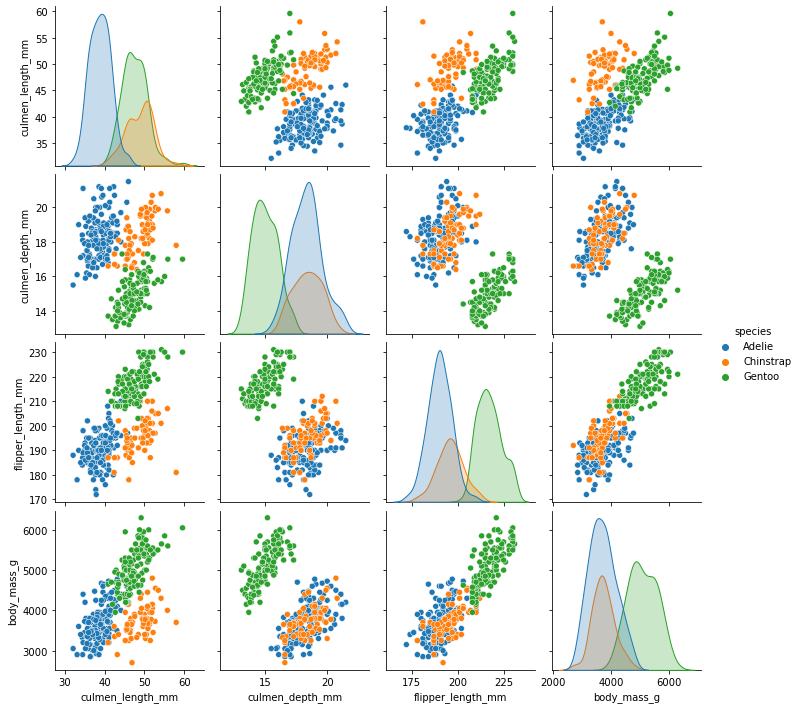

In [18]:
sns.pairplot(data=df, hue='species')

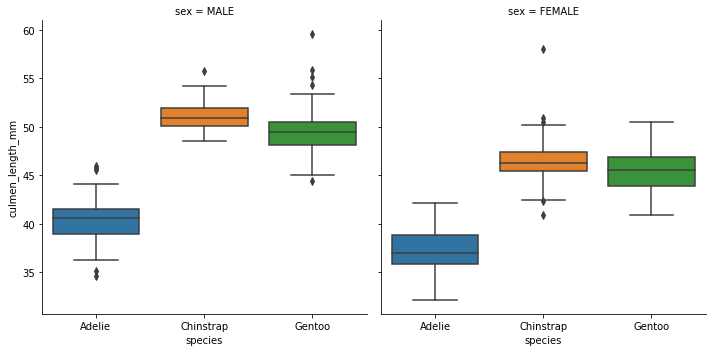

In [20]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex')

În partea teoretică am precizat faptul că Decision Trees poate rezolva probleme de label multi-class la features, Scikit-Learn încă nu suportă asta, trebuie să transformă aceste features multi-class care sunt prezente sub formă de string-uri în dummy variables

In [23]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [24]:
y = df['species']

In [25]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


În ceea ce privește algorimtul de Decision Tree, un anumit Node face o comparație directă cu un singur feature, ceea ce înseamnă că nu este nevoie să facem o scalare la aceste date deoarece nu trebuie să lucrăm cu mai multe features în același timp. Asta înseamnă că putem să sărim peste partea de scalare a datelor din Scikit-Learn și să trecem direct la partea de train-test a setului de date

In [26]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

În continuare o să importăm un model de Decision Tree din Scikit-Learn și o să creem un model inițial cu hyperparametrii default pentru a vedea performanța acestui model. Modelul o să îl importăm din sklearn.tree și poartă denumirea de DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
base_predictions = model.predict(X_test)

In [38]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [39]:
print(classification_report(y_test, base_predictions))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


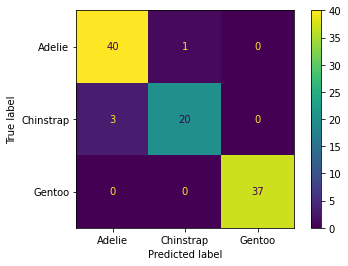

In [41]:
plot_confusion_matrix(model, X_test, y_test)

In [42]:
model.feature_importances_

array([0.33514864, 0.04203954, 0.542054  , 0.00239775, 0.07836008,
       0.        , 0.        ])

Până în acest moment, modelul se comportă precum un model de Logistic Regression, sau un model de SVM, adică ca și un model de clasificare normal. În continuare o să ne uităm la cele mai importante features care au dus la aceste rezultate

In [46]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature importances']).sort_values('Feature importances', ascending=False)

,Feature importances
flipper_length_mm,0.542054
culmen_length_mm,0.335149
island_Dream,0.078360
culmen_depth_mm,0.042040
body_mass_g,0.002398
island_Torgersen,0.000000
sex_MALE,0.000000


După cum se poate observa, cel mai important feature pe care îl ia în considerare este cel de 'flipper_length_mm'. Un lucru interesant este faptul că nu ia deloc în considerare featuruirle de island și de sex, sau aproape de loc body_mass. Acest lucru se datorează faptului că am creat un model default fără a specifica valori pentru hyperparametrii. De cele mai multe ori când se face asta, se poate întâmpla ca acest model de Decision Tree să nu ia în calcul toate features. Trebuie să îl împingem noi de la spate pentru a face asta.

Pentru a putea ce se înțelefe mai bine, ar fi util să vedem acel Decision Tree. Scikit learn are o metodă denumită 'plot_tree()' prin care putem să vizualizăm acel Tree

In [47]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'X[2] <= 206.5\ngini = 0.633\nsamples = 233\nvalue = [105, 45, 83]'),
 Text(0.2727272727272727, 0.75, 'X[0] <= 42.35\ngini = 0.418\nsamples = 147\nvalue = [104, 42, 1]'),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[4] <= 0.5\ngini = 0.274\nsamples = 50\nvalue = [7, 42, 1]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[0] <= 47.2\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[3] <= 4075.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.6363636363636364, 0.25, 'X[2] <= 196.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.5454545454545454, 0.0833

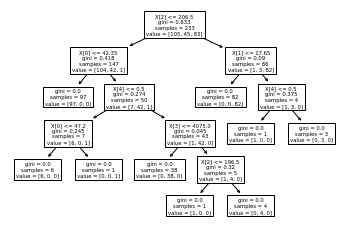

In [48]:
plot_tree(model)

Metoda în sine ne afișează și anumit text, însă dacă punem semnul ; la final de cod atunci acest cod nu o să ne mai fie afișat. Putem să creem și un figure și să mărim figura și dpi-ul

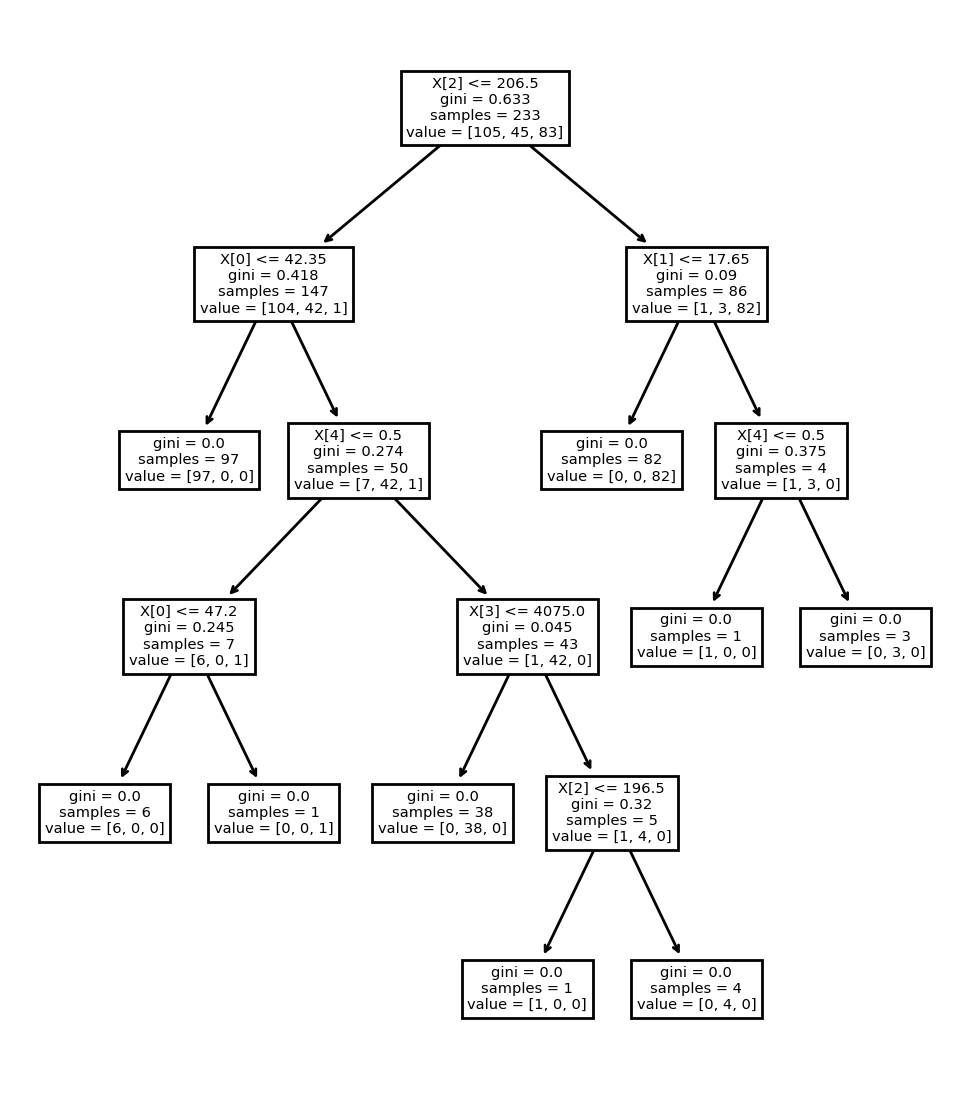

In [49]:
plt.figure(figsize=(6, 7), dpi=200)
plot_tree(model);

Putem să vedem că la Root Node are ca și feature acea coloană de 'flipper_length_mm' (X[2]) și se verifică dacă valoarea este mai mică sau mai mare de 206.5. Ca să vizualizăm mai bine acest Tree putem să înlocuim acea valoare de X[2] cu denumirea coloanelor, iar dacă folosim și argumentul de filled=True, atunci o să se și coloreze acele Nodes

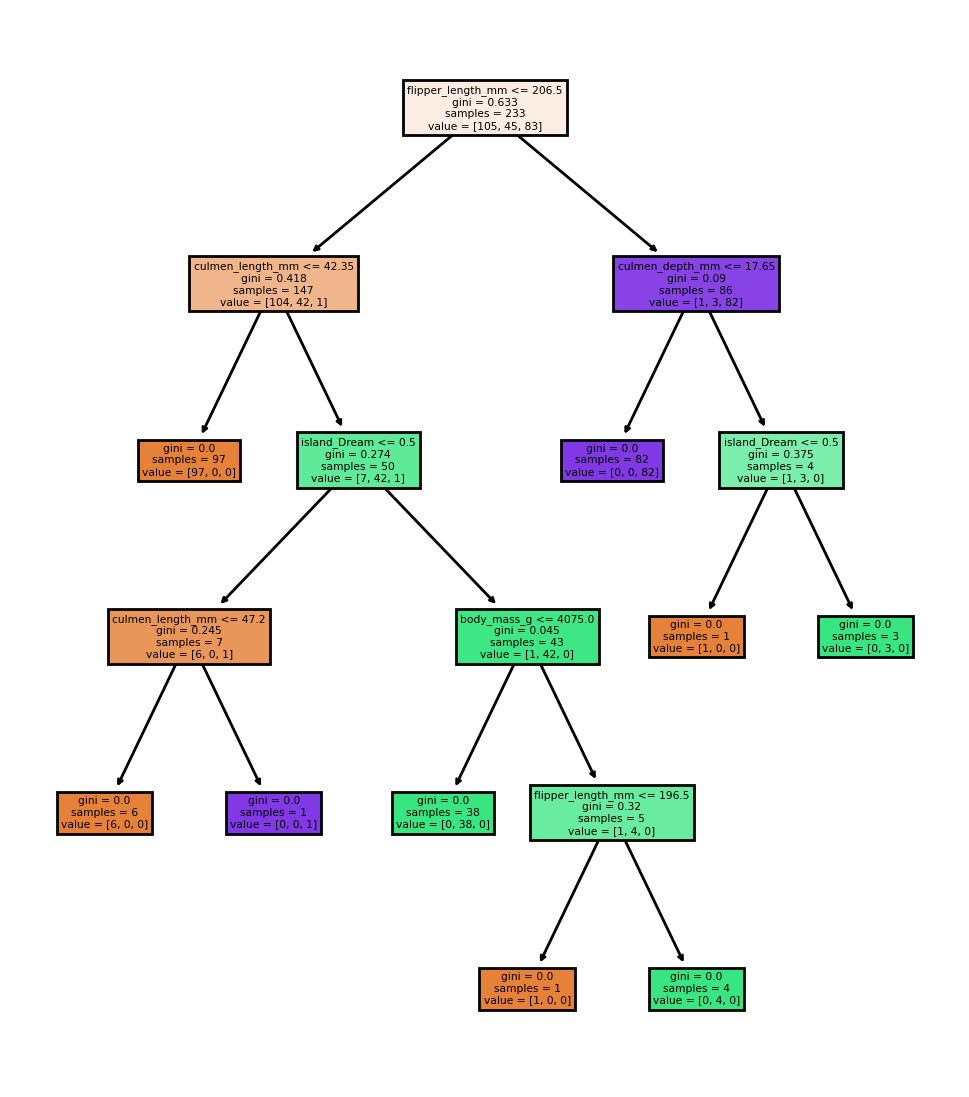

In [51]:
plt.figure(figsize=(6, 7), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

În acest Tree putem să vedem că ne este afișat și acea valoare pentru gini impurity la fiecare Node. Ce anume mai cuprinde acest Tree. Avem și partea de sample care ne spune câte elemente din setul de date au intrat în acel Node. De exemplu, la Root Node ne spune că a realizat acea comaparație pentru 233 de elemente, iar fiind acel Root Node ar trebui să cuprindă toate elementele din setul de date

In [52]:
len(X_train)

233

Acel element de values = [] care este reprezentat printr-un array ne spune câte valori sunt în fiecare clasă (la Root Node sunt 105 dintr-o clasă, 45 din a doua clasă și 83 din cea de a treia clasă). După ce s-a făcut acel splitting se poate observa că din acele 233 de elemente, 147 au mers către ramura de True, iar restul de 86 au mers către ramura de False.

În continuare o să ne creem mai multe modele cu diferite valori pentru anumiți hyperparametrii pentru a se vedea diferența acelui Tree. Pentru asta o să ne creem o funcție prin care putem să antrenăm, să facem predicții și să vizualizăm acem Tree

In [56]:
def report_model(model):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    plt.figure(figsize=(6, 7), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True)

    print(classification_report(y_test, y_preds))

    plot_confusion_matrix(model, X_test, y_test)

Pentru început o să modificăm valoarea pentru hyperparametrul 'max_depth' care îi spune modelului câte Splitting are voie să facă maxim. Momentan acest model face un număr de 5 Splitting. O să creem un model în care o să alegem valoarea 2 pentru hyperparametrul de 'max_depth'

In [57]:
pruned_model = DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


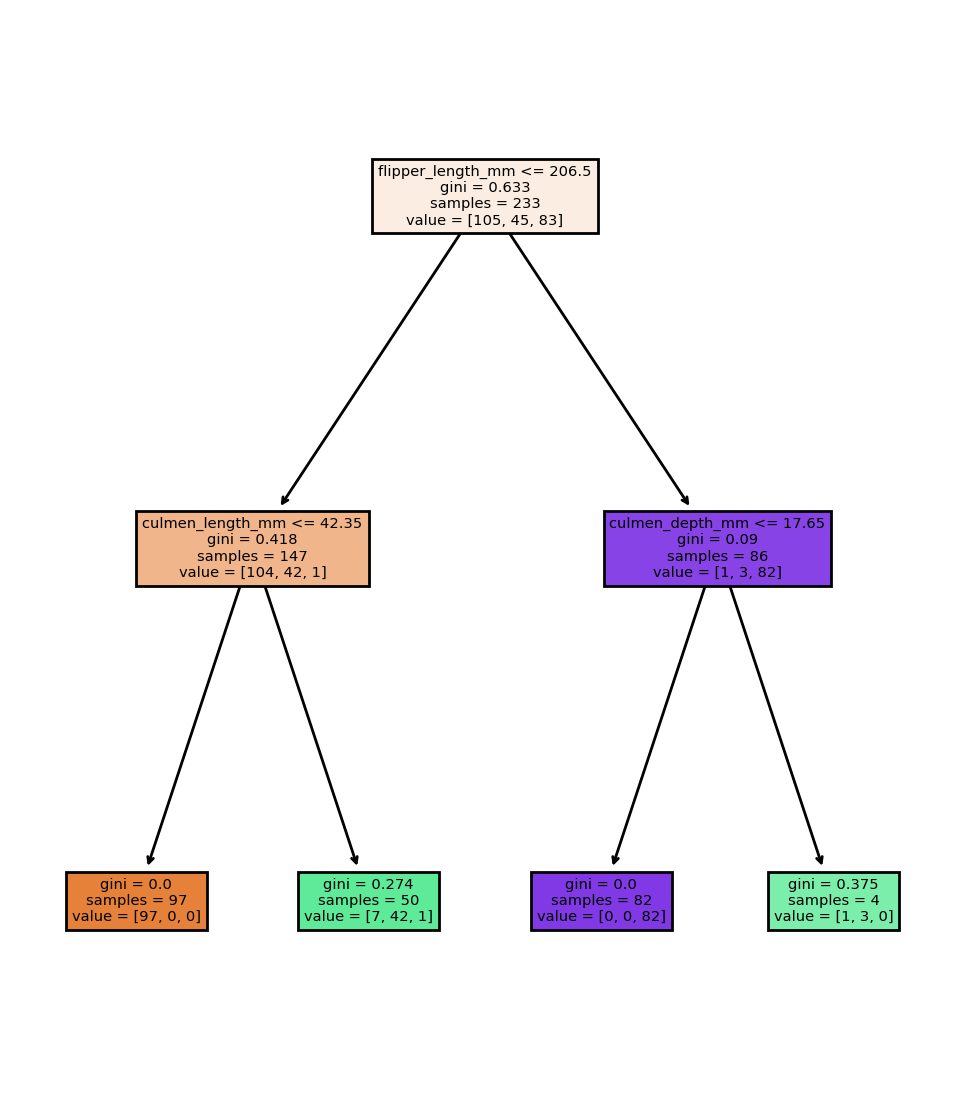

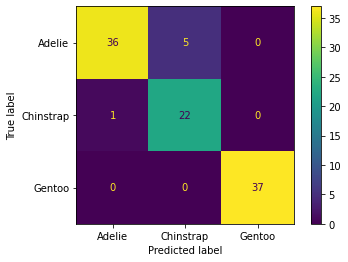

In [58]:
report_model(pruned_model)

În acest moment, modelul respectiv este mult mai simplu deoarece poate să facă maximum două rânduri de Splitting. Urmează hyperparametrul de max_leaf_nodes

In [59]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


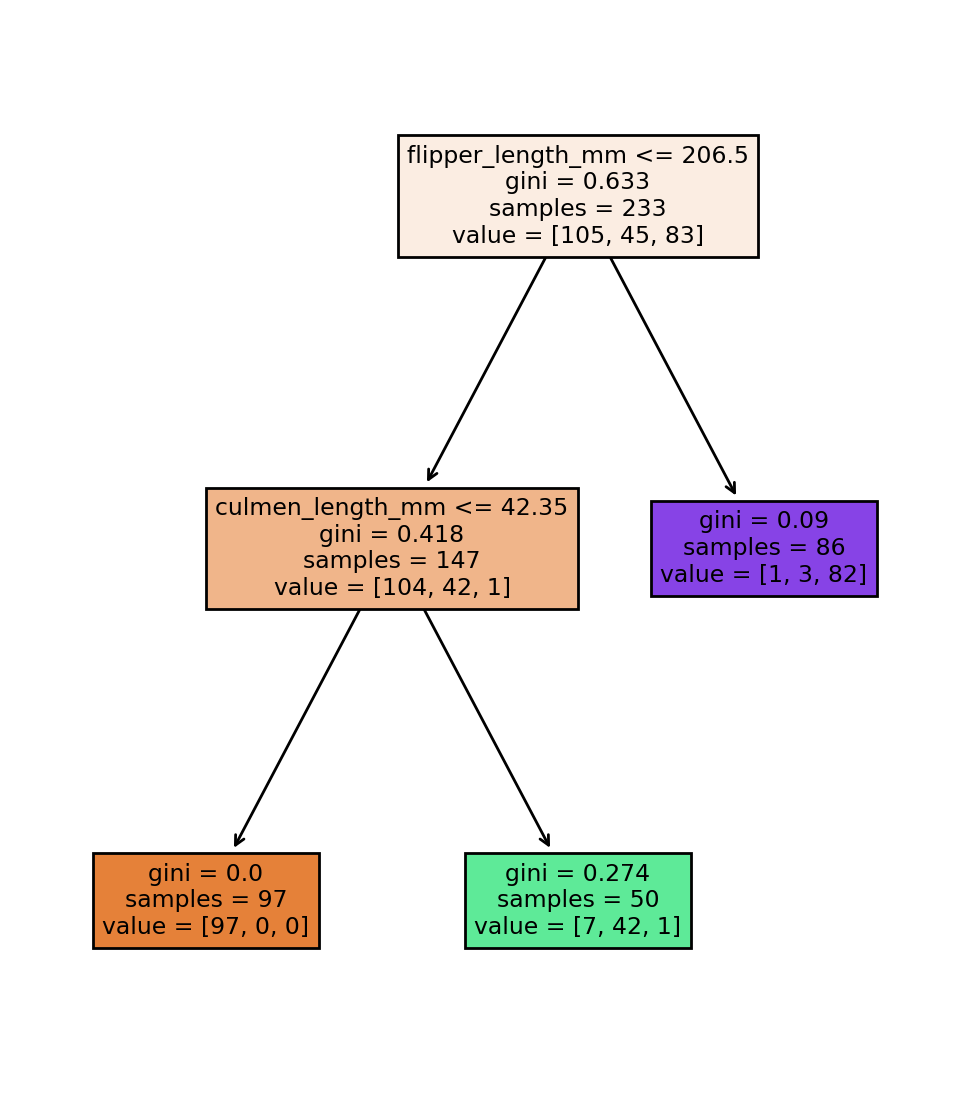

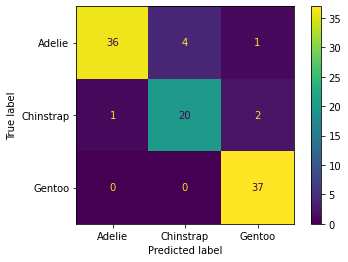

In [60]:
report_model(max_leaf_tree)

După cum știm, pentru a înțelege mai bine acest algorimt este recomandat să citim documentația acestui model pentru a vedea ce hyperparametrii are acest model și ce anume reprezintă fiecare dintre acești hyperparametrii. De asemenea, un grid search se poate rula pentru a afla valorile cele mai bune pentru acești hyperparametrii (pași pe care i-am urmat pentru fiecare model și pași pe care trebuie să îi urmăm pentru fiecare model pe care o să îl creem)

Acest algoritm de Decision Tree de cele mai multe ori o să rezulte cu un Overfitting la date, dar după cum am zis mai există anumiți algoritmi care extind acest Decision Tree, cum ar fi Random Forest sau Gradient Boosted Tree care au fost create tocmai pentru a rezolva din probleme acestui Decision Tree

## Recapitulare

În cadrul acestei secțiuni am învățat următoarele:

    1. De unde putem să importăm un model de Decision Tree

        from sklearn.tree import DecisionTreeClassifier

    2. Cum să creem un model de Decision Tree

        model = DecisionTreeClassifier()

    3. Din moment ce acest model lucrează cu fiecare feature în parte nu este nevoie să ne scalăm datele

    4. Putem să vizualizăm acel Tree utilizân metoda plot_tree din Scikit-Learn

        from sklearn.tree import plot_tree

        plot_tree(model)